In [5]:
import pandas as pd
data = pd.read_csv("thanksgiving.csv", encoding="Latin-1")
print("The dataset has", data.shape[0], "rows and", data.shape[1], "columns.")
print("")
data.head(2)

The dataset has 1058 rows and 65 columns.
Each row represent a survey respondent who was asked questions, like their gender, income, and income, and location.


,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central


In [3]:
data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [9]:
data.dtypes.values
# dtype('0') are python objects, or which we refer as String
# only 1 int64

array([dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')],
      dtype=object)

In [12]:
# Only the Respondent ID is int64 type
data.loc[:,data.dtypes == "int64"].head(2)

,RespondentID
0,4337954960
1,4337951949


The dataset is stored in the thanksgiving.csv file. It contains 1058 responses to an online survey about what Americans eat for Thanksgiving dinner. Each survey respondent was asked questions about what they typically eat for Thanksgiving, along with some demographic questions, like their gender, income, and location. This dataset will allow us to discover regional and income-based patterns in what Americans eat for Thanksgiving dinner.

The dataset has 65 columns, and 1058 rows. Most of the column names are questions, and most of the column values are string responses to the questions. Most of the columns are categorical, as a survey respondent had to select one of a few options. For example, one of the first column names is What is typically the main dish at your Thanksgiving dinner?. The potential responses are:

    Turkey
    Other (please specify)
    Ham/Pork
    Tofurkey
    Chicken
    Roast beef
    I don't know
    Turducken

Most of the columns follow the same question/response format as the above. There are also quite a few NaN values in the columns, which occurred when a survey respondent didn't fill out a question because they didn't want to, or it didn't apply to them.

## Filtering out rows from a dataframe
We want to understand what people ate for Thanksgiving. Therefore, we will remove any responses from people who does not celebrate Thanksgiving. The column `Do you celebrate Thanksgiving?` contains this information. We only want to keep data for people who answered `Yes` to this questions.

In [13]:
# Using pandas.Series.value_counts() method to display counts of how many 
# each times each category occurs in Do you Celebrate Thanksgiving? column.
data["Do you celebrate Thanksgiving?"].value_counts()

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

In [23]:
data = data[data["Do you celebrate Thanksgiving?"] == "Yes"]
data["Do you celebrate Thanksgiving?"].value_counts()

Yes    980
Name: Do you celebrate Thanksgiving?, dtype: int64

## Using value_counts to explore main dishes

In [25]:
# Observe the categories of main dish at Thanksgiving dinner
data["What is typically the main dish at your Thanksgiving dinner?"].value_counts()

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64

## Using value_counts to explore main dishes
For the people who had `Tofurkey`, that is `What is typically the main dish at your Thanksgiving dinner?` column equals Tofurkey, we want to know `Do you typically have gray?` column

In [27]:
# Observe the types of answer
data["Do you typically have gravy?"].value_counts()

Yes    892
No      82
Name: Do you typically have gravy?, dtype: int64

In [35]:
data[data["What is typically the main dish at your Thanksgiving dinner?"] == "Tofurkey"]["Do you typically have gravy?"]

4      Yes
33     Yes
69      No
72      No
77     Yes
145    Yes
175    Yes
218     No
243    Yes
275     No
393    Yes
399    Yes
571    Yes
594    Yes
628     No
774     No
820     No
837    Yes
860     No
953    Yes
Name: Do you typically have gravy?, dtype: object

## Figuring Out What Pies People Eat

In [93]:
apple = "Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple"
pumpkin = "Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin"
pecan = "Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan"

# Solution using pd.isnull
apple_isnull = pd.isnull(data[apple]) == False
pumpkin_isnull = pd.isnull(data[pumpkin]) == False
pecan_isnull = pd.isnull(data[pecan]) == False

# Boolean series where respondent ate all three pies 
ate_pies = apple_isnull & pumpkin_isnull & pecan_isnull

# Filtered data frame where respondent ate all three pies
ate_all_pies_df  = data[ate_pies]

print("Number of people who ate all pies are", ate_all_pies_df.shape[0])
# Dataframe contains only all pies columns
# ate_all_pies_df.loc[:,[apple, pumpkin, pecan]].head(3)

Number of people who ate all pies are 137


In [94]:
# Alternative Solution using .notnull()
ate_all_pies_df2 = data[data[apple].notnull() & data[pumpkin].notnull() & data[pecan].notnull()]
print("Number of people who ate all pies are", ate_all_pies_df2.shape[0])
# Dataframe contains only all pies columns
#ate_all_pies_df.loc[:,[apple, pecan, pumpkin]]

Number of people who ate all pies are 137


## Converting Age To Numeric
Let's analyze the Age column in more depth. In order to analyze the Age column, we'll first need to convert it to numeric values. This will make it simple to figure out things like the average age of survey respondents. The Age column contains values that fall into one of a few categories:

    18 - 29
    30 - 44
    45 - 59
    60+
    null

Because we're missing the exact age value, we won't be able to extract an exact integer value, and we'll instead have to extract the first age value in the strings given.

We can do this by splitting each value on the space character (), then taking the first item in the resulting list. We'll also have to replace the + character to account for 60+, which follows a different format than the rest.

**Instruction**

- Write a function to convert a single string to an appropriate integer value. This will allow us to convert the values in the Age column to integers.
    - Use the isnull() function to check if the value is null. If it is, return None.
    - Split the string on the space character (), and extract the first item of the resulting list.
    - Replace the + character in the result with an empty string to remove it.
    - Use int() to convert the result to an integer.
    - Return the result.
- Use the pandas.Series.apply() method to apply the function to each value in the Age column of data.
    - Assign the result to the int_age column of data.
- Call the pandas.Series.describe() method on the int_age column of data, and display the result.
   In a separate markdown cell, write up your findings.
    - Is there anything that we should be aware of about the results or our methodology?
    - Is this a true depiction of the ages of survey participants?


In [95]:
data["Age"].value_counts()

45 - 59    269
60+        258
30 - 44    235
18 - 29    185
Name: Age, dtype: int64

In [97]:
def extract_age(age_str):
    if pd.isnull(age_str):
        return None
    age_str = age_str.split(" ")[0]
    age_str = age_str.replace("+", "")
    return int(age_str)

data["int_age"] = data["Age"].apply(extract_age)
data["int_age"].describe()

count    947.000000
mean      40.089757
std       15.352014
min       18.000000
25%       30.000000
50%       45.000000
75%       60.000000
max       60.000000
Name: int_age, dtype: float64

## Findings

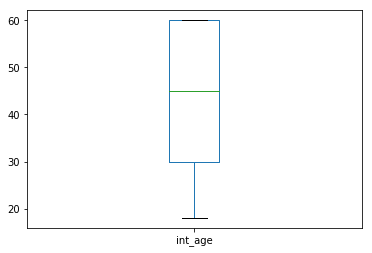

In [102]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
data["int_age"].plot(kind="box")

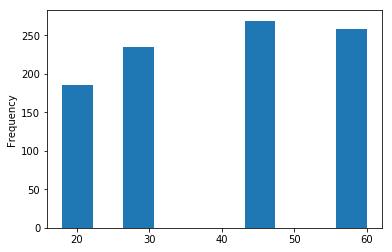

In [103]:
%matplotlib inline
data["int_age"].plot(kind="hist")

From the histogram plot, the integer approximation of respondent's age are close to a normal distribution but fairly equally distribution among the age groups.
No, it is not true depiction of respondents age because we take the lower bound of respondents age. A large gap of missing data from the lower bound to upper bound of those age range.

## Converting Income to Numeric
The `How much total combined money did all members of your HOUSEHOLD earn last year?` column is very similar to the Age column. It contains categories, but can be converted to numerical values. Here are the unique values in the column:

    Prefer not to answer
    $0 to $9,999
    $10,000 to $24,999
    $25,000 to $49,999
    $50,000 to $74,999
    $75,000 to $99,999
    $100,000 to $124,999
    $125,000 to $149,999
    $150,000 to $174,999
    $175,000 to $199,999
    $200,000 and up
    null

We can convert these values to numeric by again splitting on the space character (). We'll then have to account for the string Prefer. Finally, we'll be able to replace the dollar sign character $ and the comma ,, and return the result.

In [110]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts()

$25,000 to $49,999      166
$75,000 to $99,999      127
$50,000 to $74,999      127
Prefer not to answer    118
$100,000 to $124,999    109
$200,000 and up          76
$10,000 to $24,999       60
$0 to $9,999             52
$125,000 to $149,999     48
$150,000 to $174,999     38
$175,000 to $199,999     26
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [112]:
def income_range(income_str):
    if pd.isnull(income_str):
        return None
    income_str = income_str.split(" ")[0]
    if income_str == "Prefer":
        return None
    income_str = income_str.replace("$", "").replace(",","")
    return int(income_str)
data["int_income"] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(income_range)
data["int_income"].describe()

count       829.000000
mean      75965.018094
std       59068.636748
min           0.000000
25%       25000.000000
50%       75000.000000
75%      100000.000000
max      200000.000000
Name: int_income, dtype: float64

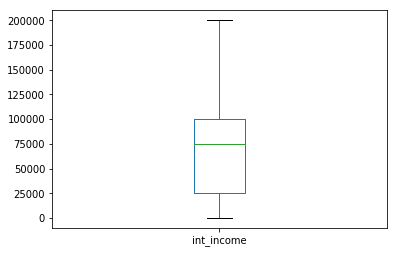

In [113]:
%matplotlib inline
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
data["int_income"].plot(kind="box")

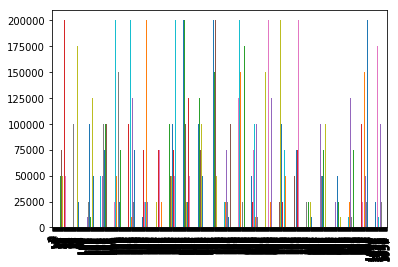

In [114]:
%matplotlib inline
data["int_income"].plot(kind="bar")

The income approximation data has no significant value since the standard deviation are very large. The data is discontinuous since values takes the lower bound values. 

## Correlating Travel Distance And Income
We can now see how the distance someone travels for Thanksgiving dinner relates to their income level. It's safe to hypothesize that people earning less money could be younger, and would travel to their parent's houses for Thanksgiving. People earning more are more likely to have Thanksgiving at their house as a result.

We can test this by filtering data based on int_income, and seeing what the values in the How far will you travel for Thanksgiving? column are.

In [116]:
# For income less than $150,000, show the category on where they travel for Thanksgiving
data[data["int_income"] < 150000].loc[:,"How far will you travel for Thanksgiving?"].value_counts()

Thanksgiving is happening at my home--I won't travel at all                         281
Thanksgiving is local--it will take place in the town I live in                     203
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    150
Thanksgiving is out of town and far away--I have to drive several hours or fly       55
Name: How far will you travel for Thanksgiving?, dtype: int64

In [117]:
# For income greater than $150,000, show the category on where they travel for Thanksgiving
data[data["int_income"] > 150000].loc[:,"How far will you travel for Thanksgiving?"].value_counts()

Thanksgiving is happening at my home--I won't travel at all                         49
Thanksgiving is local--it will take place in the town I live in                     25
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    16
Thanksgiving is out of town and far away--I have to drive several hours or fly      12
Name: How far will you travel for Thanksgiving?, dtype: int64

Lesser income earners tend to stay at home or celebrate locally. 

## Linking Friendship and Age
There are two columns which directly pertain to friendship, Have you ever tried to meet up with hometown friends on Thanksgiving night?, and Have you ever attended a "Friendsgiving?. In the US, a "Friendsgiving" is when instead of traveling home for the holiday, you celebrate it with friends who live in your area. Both questions seem skewed towards younger people. Let's see if this hypothesis holds up.

In order to see the average ages of people who have done both, we can use a pivot table. As you may recall from an earlier mission, we can generate a pivot table with the pandas.DataFrame.pivot_table() method. By calling this method on data, and passing in the right keyword arguments, we can generate a table showing the average ages of people who answered Yes to both questions, answered Yes to one question, and so on.

In [121]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    Create a spreadsheet-style pivot table as a DataFrame. The levels in
    the pivot table will be stored in MultiIndex objects (hierarchical
    indexes) on the index and columns of the result DataFrame
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can c

In [133]:
pd.pivot_table(data, index="Have you ever tried to meet up with hometown friends on Thanksgiving night?",
           columns='Have you ever attended a "Friendsgiving?"',
           values="int_age")

# Or 
'''
data.pivot_table(index="Have you ever tried to meet up with hometown friends on Thanksgiving night?",
                 columns='Have you ever attended a "Friendsgiving?"', values="int_age")
'''

'\ndata.pivot_table(index="Have you ever tried to meet up with hometown friends on Thanksgiving night?",\n                 columns=\'Have you ever attended a "Friendsgiving?"\', values="int_age")\n'

In [132]:
#or 


"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,42.283702,37.010526
Yes,41.475410,33.976744


In [134]:
data.pivot_table(index="Have you ever tried to meet up with hometown friends on Thanksgiving night?",
                 columns='Have you ever attended a "Friendsgiving?"', values="int_income")

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,78914.549654,72894.736842
Yes,78750.000000,66019.736842


It appears younger people are more likely to attend Friendsgiving and try to meetup with friends on Thanksgiving.